In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print(df.shape)

(25, 2)


In [5]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'Percentage')

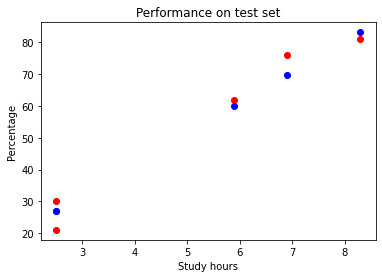

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_test, color = 'red')
plt.scatter(x_test,y_pred, color = 'blue')
plt.title("Performance on test set")
plt.xlabel("Study hours")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

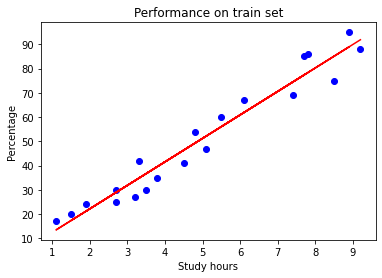

In [10]:
plt.plot(x_train,regressor.predict(x_train), color = 'red')
plt.scatter(x_train,y_train, color = 'blue')
plt.title("Performance on train set")
plt.xlabel("Study hours")
plt.ylabel("Percentage")

In [11]:
ans = regressor.predict([[9.25]])
print(ans)

[92.38611528]


In [24]:
##!pip install pycaret
!pip install --upgrade --user git+git://github.com/pycaret/pycaret.git

  Cloning git://github.com/pycaret/pycaret.git to /tmp/pip-req-build-5bdqw4gv
  Running command git clone -q git://github.com/pycaret/pycaret.git /tmp/pip-req-build-5bdqw4gv
     |████████████████████████████████| 6.8MB 5.3MB/s 
     |████████████████████████████████| 276kB 44.1MB/s 
     |████████████████████████████████| 157.5MB 46kB/s 
     |████████████████████████████████| 1.8MB 27.7MB/s 
     |████████████████████████████████| 1.6MB 33.1MB/s 
     |████████████████████████████████| 102kB 5.1MB/s 
     |████████████████████████████████| 66.3MB 53kB/s 
     |████████████████████████████████| 266kB 39.9MB/s 
     |████████████████████████████████| 13.9MB 33.4MB/s 
     |████████████████████████████████| 174kB 49.1MB/s 
     |████████████████████████████████| 2.1MB 39.2MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 3.1MB 39.3MB/s 
     |████████████████████████████████| 604kB 45.9MB/s 
     |████████████████████████████████| 153kB 

In [12]:
from pycaret.regression import *

In [24]:
reg = setup(data = df, target='Scores')
compare_models(exclude=["lightgbm"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,6.4304,48.9229,6.4585,NaN,0.0,0.1223,0.267
lasso,Lasso Regression,6.4335,48.8784,6.4686,NaN,0.0,0.1235,0.014
ridge,Ridge Regression,6.4247,48.7176,6.4566,NaN,0.0,0.1228,0.012
en,Elastic Net,6.3805,53.5710,6.5376,NaN,0.0,0.1263,0.013
lar,Least Angle Regression,6.4304,48.9228,6.4585,NaN,0.0,0.1223,0.013
llar,Lasso Least Angle Regression,6.6922,66.1242,7.0110,NaN,0.0,0.1385,0.012
omp,Orthogonal Matching Pursuit,6.4304,48.9228,6.4585,NaN,0.0,0.1223,0.012
br,Bayesian Ridge,6.4360,48.9678,6.4653,NaN,0.0,0.1227,0.012
par,Passive Aggressive Regressor,9.3003,115.0123,9.9808,NaN,0.0,0.1659,0.012
huber,Huber Regressor,6.4809,50.1673,6.5420,NaN,0.0,0.1231,0.016


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)